In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('foreveralone.csv')
df

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,6/2/2016 5:04:24,Female,Straight,26,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,Yes but I haven't,10.0,Yes,No,"Set me up with a date, date coaching",No,Employed for wages,Consultant IT,Master’s degree,Joined a gym/go to the gym
465,6/3/2016 19:25:46,Male,Straight,31,"$30,000 to $39,999",White non-Hispanic,Normal weight,No,No,Yes but I haven't,10.0,No,No,I don't want help,No,Employed for wages,castor,"High school graduate, diploma or the equivalen...","Other exercise, join clubs/socual clubs/meet ups"
466,6/6/2016 1:36:55,Female,Straight,17,"$1 to $10,000",Asian,Normal weight,Yes,No,No,20.0,Yes,Yes,wingman/wingwoman,Yes,Employed for wages,receptionist,"Some high school, no diploma","Joined a gym/go to the gym, Other exercise, jo..."
467,8/14/2016 15:10:41,Male,Straight,18,$0,Asian,Obese,Yes,No,No,16.0,Yes,Yes,Set me up with a date,No,Out of work but not currently looking for work,Student,"High school graduate, diploma or the equivalen...","Joined a gym/go to the gym, Therapy"


In [3]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   469 non-null    object 
 1   gender                 469 non-null    object 
 2   sexuallity             469 non-null    object 
 3   age                    469 non-null    int64  
 4   income                 469 non-null    object 
 5   race                   469 non-null    object 
 6   bodyweight             469 non-null    object 
 7   virgin                 469 non-null    object 
 8   prostitution_legal     469 non-null    object 
 9   pay_for_sex            469 non-null    object 
 10  friends                469 non-null    float64
 11  social_fear            469 non-null    object 
 12  depressed              469 non-null    object 
 13  what_help_from_others  469 non-null    object 
 14  attempt_suicide        469 non-null    object 
 15  employ

In [4]:
df.describe()

,age,friends
count,469.000000,469.000000
mean,23.963753,7.956716
std,6.023526,34.371500
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


In [5]:
df.columns

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how'],
      dtype='object')

## Feature Selection

According to case study we can consider some important featuers 

['gender', 'sexuallity', 'friends', 'age', 'income', 'bodyweight', 'virgin', 'social_fear', 'depressed']


target variable = 'attempt_suicide'

In [6]:
cols = ['gender', 'sexuallity', 'friends', 'age', 'income', 'bodyweight', 'virgin', 'social_fear', 'employment', 'depressed', 'attempt_suicide']

In [7]:
for i in cols:
    print('-----------------------------------')
    print(i, ':')
    print(df[i].value_counts())
    #print('Unique Values :', df[i].unique())
    print('Number of Unique values:', len(df[i].unique()))
    print('\n')

-----------------------------------
gender :
Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64
Number of Unique values: 4


-----------------------------------
sexuallity :
Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64
Number of Unique values: 3


-----------------------------------
friends :
0.0      109
1.0       54
5.0       45
3.0       44
2.0       42
10.0      34
4.0       27
6.0       26
20.0      16
15.0      12
7.0       10
8.0       10
12.0       8
30.0       6
16.0       3
40.0       3
13.0       3
9.0        2
100.0      2
17.0       2
25.0       2
600.0      1
400.0      1
11.0       1
28.0       1
60.0       1
80.0       1
0.5        1
18.0       1
0.2        1
Name: friends, dtype: int64
Number of Unique values: 30


-----------------------------------
age :
23    46
21    41
22    40
18    39
20    39
24    37
19    32
25    30
26    26
28    21
30 

In [8]:
df1 = df[cols]

In [9]:
df1

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,employment,depressed,attempt_suicide
0,Male,Straight,0.0,35,"$30,000 to $39,999",Normal weight,Yes,Yes,Employed for wages,Yes,Yes
1,Male,Bisexual,0.0,21,"$1 to $10,000",Underweight,Yes,Yes,Out of work and looking for work,Yes,No
2,Male,Straight,10.0,22,$0,Overweight,Yes,Yes,Out of work but not currently looking for work,Yes,No
3,Male,Straight,8.0,19,"$1 to $10,000",Overweight,Yes,Yes,A student,Yes,No
4,Male,Straight,10.0,23,"$30,000 to $39,999",Overweight,No,No,Employed for wages,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
464,Female,Straight,10.0,26,"$10,000 to $19,999",Overweight,Yes,Yes,Employed for wages,No,No
465,Male,Straight,10.0,31,"$30,000 to $39,999",Normal weight,No,No,Employed for wages,No,No
466,Female,Straight,20.0,17,"$1 to $10,000",Normal weight,Yes,Yes,Employed for wages,Yes,Yes
467,Male,Straight,16.0,18,$0,Obese,Yes,Yes,Out of work but not currently looking for work,Yes,No


In [10]:
df1.isna().sum()

gender             0
sexuallity         0
friends            0
age                0
income             0
bodyweight         0
virgin             0
social_fear        0
employment         0
depressed          0
attempt_suicide    0
dtype: int64

In [11]:
cat_cols = ['gender', 'sexuallity', 'bodyweight', 'virgin', 'social_fear', 'depressed', 'employment', 'attempt_suicide']

In [12]:
for i in cat_cols:
    print('-----------------------------------')
    print(i, ':')
    print(df1[i].value_counts())
    #print('Unique Values :', df[i].unique())
    print('Number of Unique values:', len(df[i].unique()))
    print('\n')

-----------------------------------
gender :
Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64
Number of Unique values: 4


-----------------------------------
sexuallity :
Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64
Number of Unique values: 3


-----------------------------------
bodyweight :
Normal weight    269
Overweight       113
Underweight       62
Obese             25
Name: bodyweight, dtype: int64
Number of Unique values: 4


-----------------------------------
virgin :
Yes    352
No     117
Name: virgin, dtype: int64
Number of Unique values: 2


-----------------------------------
social_fear :
Yes    308
No     161
Name: social_fear, dtype: int64
Number of Unique values: 2


-----------------------------------
depressed :
Yes    312
No     157
Name: depressed, dtype: int64
Number of Unique values: 2


-----------------------------------
employment :
A 

In [13]:
df1['gender'].replace('Transgender male', 'Male', inplace=True)

df1['gender'].replace('Transgender female', 'Female', inplace=True)

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
df1.nunique()

gender              2
sexuallity          3
friends            30
age                35
income             13
bodyweight          4
virgin              2
social_fear         2
employment          9
depressed           2
attempt_suicide     2
dtype: int64

In [15]:
df1

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,employment,depressed,attempt_suicide
0,Male,Straight,0.0,35,"$30,000 to $39,999",Normal weight,Yes,Yes,Employed for wages,Yes,Yes
1,Male,Bisexual,0.0,21,"$1 to $10,000",Underweight,Yes,Yes,Out of work and looking for work,Yes,No
2,Male,Straight,10.0,22,$0,Overweight,Yes,Yes,Out of work but not currently looking for work,Yes,No
3,Male,Straight,8.0,19,"$1 to $10,000",Overweight,Yes,Yes,A student,Yes,No
4,Male,Straight,10.0,23,"$30,000 to $39,999",Overweight,No,No,Employed for wages,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
464,Female,Straight,10.0,26,"$10,000 to $19,999",Overweight,Yes,Yes,Employed for wages,No,No
465,Male,Straight,10.0,31,"$30,000 to $39,999",Normal weight,No,No,Employed for wages,No,No
466,Female,Straight,20.0,17,"$1 to $10,000",Normal weight,Yes,Yes,Employed for wages,Yes,Yes
467,Male,Straight,16.0,18,$0,Obese,Yes,Yes,Out of work but not currently looking for work,Yes,No


In [16]:
df1['income']

0      $30,000 to $39,999
1           $1 to $10,000
2                      $0
3           $1 to $10,000
4      $30,000 to $39,999
              ...        
464    $10,000 to $19,999
465    $30,000 to $39,999
466         $1 to $10,000
467                    $0
468    $40,000 to $49,999
Name: income, Length: 469, dtype: object

In [17]:
df1['income'].value_counts()

$0                      160
$1 to $10,000           100
$10,000 to $19,999       58
$20,000 to $29,999       44
$30,000 to $39,999       39
$50,000 to $74,999       28
$40,000 to $49,999       16
$75,000 to $99,999        9
$125,000 to $149,999      6
$100,000 to $124,999      3
$150,000 to $174,999      2
$174,999 to $199,999      2
$200,000 or more          2
Name: income, dtype: int64

In [18]:
df1

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,employment,depressed,attempt_suicide
0,Male,Straight,0.0,35,"$30,000 to $39,999",Normal weight,Yes,Yes,Employed for wages,Yes,Yes
1,Male,Bisexual,0.0,21,"$1 to $10,000",Underweight,Yes,Yes,Out of work and looking for work,Yes,No
2,Male,Straight,10.0,22,$0,Overweight,Yes,Yes,Out of work but not currently looking for work,Yes,No
3,Male,Straight,8.0,19,"$1 to $10,000",Overweight,Yes,Yes,A student,Yes,No
4,Male,Straight,10.0,23,"$30,000 to $39,999",Overweight,No,No,Employed for wages,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
464,Female,Straight,10.0,26,"$10,000 to $19,999",Overweight,Yes,Yes,Employed for wages,No,No
465,Male,Straight,10.0,31,"$30,000 to $39,999",Normal weight,No,No,Employed for wages,No,No
466,Female,Straight,20.0,17,"$1 to $10,000",Normal weight,Yes,Yes,Employed for wages,Yes,Yes
467,Male,Straight,16.0,18,$0,Obese,Yes,Yes,Out of work but not currently looking for work,Yes,No


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           469 non-null    object 
 1   sexuallity       469 non-null    object 
 2   friends          469 non-null    float64
 3   age              469 non-null    int64  
 4   income           469 non-null    object 
 5   bodyweight       469 non-null    object 
 6   virgin           469 non-null    object 
 7   social_fear      469 non-null    object 
 8   employment       469 non-null    object 
 9   depressed        469 non-null    object 
 10  attempt_suicide  469 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 23.9+ KB


In [20]:
df1.columns

Index(['gender', 'sexuallity', 'friends', 'age', 'income', 'bodyweight',
       'virgin', 'social_fear', 'employment', 'depressed', 'attempt_suicide'],
      dtype='object')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           469 non-null    object 
 1   sexuallity       469 non-null    object 
 2   friends          469 non-null    float64
 3   age              469 non-null    int64  
 4   income           469 non-null    object 
 5   bodyweight       469 non-null    object 
 6   virgin           469 non-null    object 
 7   social_fear      469 non-null    object 
 8   employment       469 non-null    object 
 9   depressed        469 non-null    object 
 10  attempt_suicide  469 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 23.9+ KB


In [22]:
df1.describe()

,friends,age
count,469.000000,469.000000
mean,7.956716,23.963753
std,34.371500,6.023526
min,0.000000,12.000000
25%,1.000000,20.000000
50%,3.000000,23.000000
75%,7.000000,26.000000
max,600.000000,70.000000


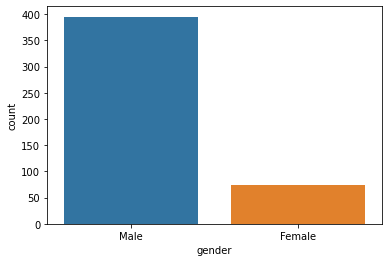

In [23]:
sns.countplot(df1['gender'])

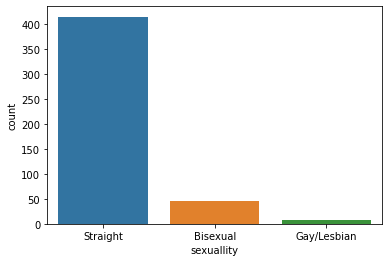

In [24]:
sns.countplot(df1['sexuallity'])

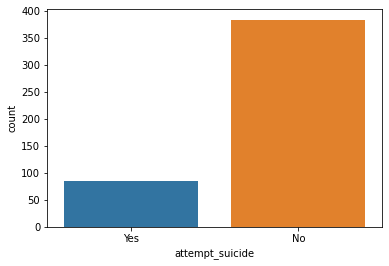

In [25]:
sns.countplot(df1['attempt_suicide'])

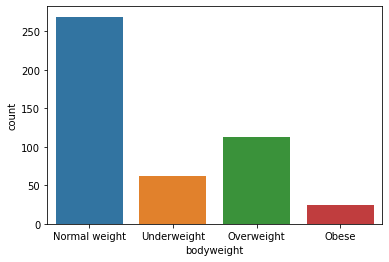

In [26]:
sns.countplot(df1['bodyweight'])

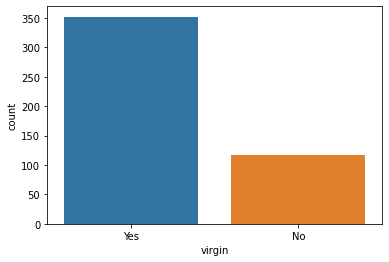

In [27]:
sns.countplot(df1['virgin'])

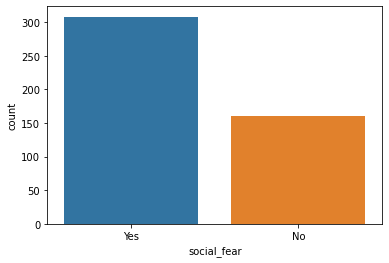

In [28]:
sns.countplot(df1['social_fear'])

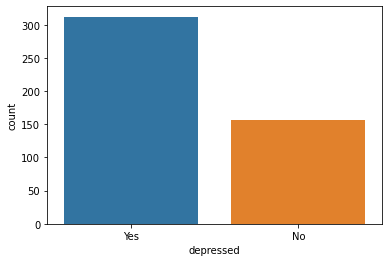

In [29]:
sns.countplot(df1['depressed'])

In [30]:
df1.corr()

,friends,age
friends,1.000000,0.050807
age,0.050807,1.000000


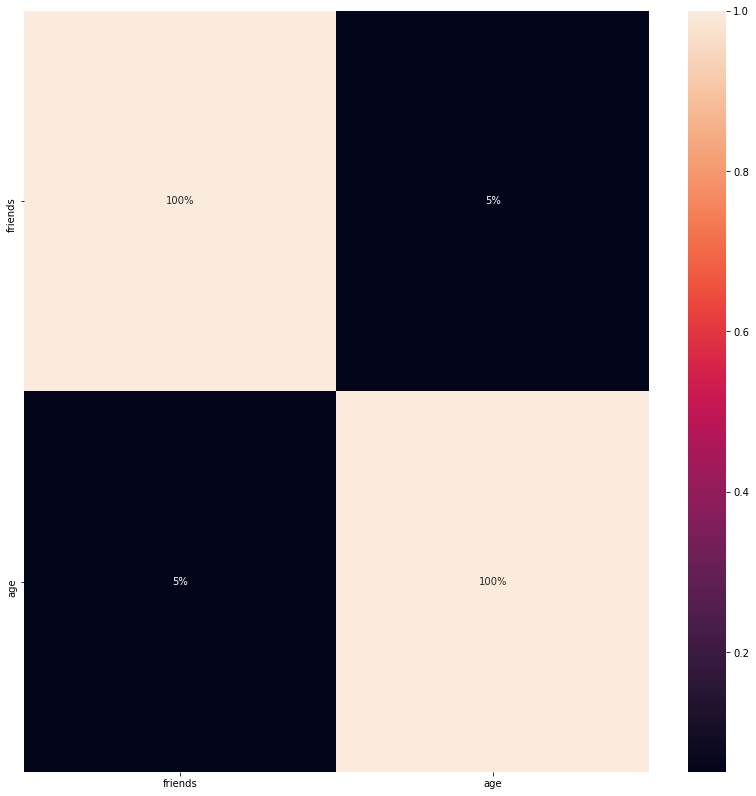

In [31]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

In [32]:
df1.tail(20)

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,employment,depressed,attempt_suicide
449,Male,Straight,5.0,27,"$1 to $10,000",Overweight,Yes,No,A student,Yes,Yes
450,Male,Straight,10.0,23,"$30,000 to $39,999",Normal weight,No,No,Employed for wages,No,No
451,Female,Straight,2.0,25,$0,Normal weight,Yes,Yes,A student,No,No
452,Male,Straight,15.0,22,"$1 to $10,000",Normal weight,Yes,No,A student,No,No
453,Male,Straight,2.0,23,$0,Normal weight,Yes,Yes,A student,No,No
454,Female,Straight,0.0,21,"$10,000 to $19,999",Overweight,No,Yes,Employed for wages,No,No
455,Female,Straight,30.0,31,"$40,000 to $49,999",Overweight,No,Yes,Employed for wages,Yes,No
456,Male,Straight,2.0,18,$0,Normal weight,Yes,Yes,A student,Yes,No
457,Male,Straight,30.0,18,"$1 to $10,000",Normal weight,Yes,Yes,A student,No,No
458,Male,Straight,11.0,24,"$75,000 to $99,999",Normal weight,No,Yes,Employed for wages,No,No


In [33]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = LabelEncoder().fit_transform(df1[column])

<ipython-input-33-9a768336ebce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = LabelEncoder().fit_transform(df1[column])


In [34]:
final_df = df1

In [35]:
X = final_df.drop('attempt_suicide', axis=1)
y = final_df['attempt_suicide']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=92)

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
model.score(X_train, y_train)

0.8262195121951219

In [40]:
model.score(X_test, y_test)

0.8368794326241135

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
print('Confustion Matrix : \n\n', confusion_matrix(y_test,  rf.predict(X_test)))
print('\n Accuracy Score : ',   accuracy_score(y_test,  rf.predict(X_test)))
print('\n Classification Report : \n \n',classification_report(y_test, rf.predict(X_test)))

Confustion Matrix : 

 [[110   6]
 [ 18   7]]

 Accuracy Score :  0.8297872340425532

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       116
           1       0.54      0.28      0.37        25

    accuracy                           0.83       141
   macro avg       0.70      0.61      0.64       141
weighted avg       0.80      0.83      0.81       141



In [44]:
rf.predict([[1,2,3.0,28,10,0,1,1,2,1]])

array([0])

In [45]:
final_df[final_df['attempt_suicide'] == 1]

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,employment,depressed,attempt_suicide
0,1,2,0.0,35,9,0,1,1,2,1,1
5,1,2,2.0,24,11,0,1,1,2,1,1
7,0,1,10.0,24,7,0,1,1,2,1,1
9,1,2,6.0,33,11,2,0,1,2,1,1
11,1,2,0.0,25,1,0,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,3.0,20,1,0,1,1,1,1,1
449,1,2,5.0,27,1,2,1,0,1,1,1
461,1,2,5.0,18,1,2,1,1,2,1,1
463,1,0,0.5,12,0,1,0,1,1,0,1


In [46]:
rf.predict([[1,2,5.0,8,1,2,1,1,2,1]])

array([1])

In [47]:
rf.feature_importances_

array([0.037262  , 0.0564589 , 0.16959111, 0.26218095, 0.12479425,
       0.0897075 , 0.03544647, 0.04236382, 0.12583094, 0.05636406])

In [48]:
for i in range(len(final_df.columns)-1):
    print(f"Feature importance of {final_df.columns[i]}  :   {rf.feature_importances_[i]}")

Feature importance of gender  :   0.037261997176259186
Feature importance of sexuallity  :   0.05645890189311973
Feature importance of friends  :   0.16959111314365719
Feature importance of age  :   0.26218095329911223
Feature importance of income  :   0.12479425477010646
Feature importance of bodyweight  :   0.08970749908019116
Feature importance of virgin  :   0.035446470815192456
Feature importance of social_fear  :   0.04236381506526452
Feature importance of employment  :   0.12583093944605345
Feature importance of depressed  :   0.056364055311043694


In [49]:
# saving the model to the local file system
filename = 'model.pkl'
joblib.dump(rf, open(filename, 'wb'))

In [50]:
joblib.load(open('model.pkl','rb'))

RandomForestClassifier()